In [1]:
import numpy as np
from scipy.spatial import Delaunay
from scipy.interpolate import LinearNDInterpolator
import pickle
import sys
import os
project_path = os.path.abspath(os.path.join(os.getcwd(), '..', ''))
sys.path.append(project_path)
from python.python_code.data_manip.extraction.telemac_file import TelemacFile
from python.create_dgl_dataset import add_mesh_info
# Load your data (assuming these functions are defined elsewhere)
fine_mesh = '/work/m24046/m24046mrcr/results_data_30min_35_70/maillage_3.slf'
coarse_mesh = '/work/m24046/m24046mrcr/results_data_30min_35_70_maillagex4/Mesh4_corrige.slf'
res_fine_mesh = TelemacFile(fine_mesh)
res_coarse_mesh = TelemacFile(coarse_mesh)
X_fine, triangles_fine = add_mesh_info(res_fine_mesh)
X_coarse, triangles_coarse = add_mesh_info(res_coarse_mesh)

with open('/work/m24046/m24046mrcr/results_data_30min_35_70/Group_3_peak_1800_Group_3_peak_1800_0_0-80.pkl','rb') as fp:
    valeurs = pickle.load(fp)

# Precompute the triangulation
triangulation = Delaunay(X_fine)

In [16]:
# Chemin du dossier contenant les fichiers .pkl
folder_path = "/work/m24046/m24046mrcr/results_data_30min_35_70_maillagex4/"

# Parcours de tous les fichiers dans le dossier
for filename in os.listdir(folder_path):
    print(filename)
    if filename.endswith(".pkl"):  # Vérifie si le fichier est un .pkl
        file_path = os.path.join(folder_path, filename)
        with open(file_path, "rb") as file:
            try:
                data = pickle.load(file)  # Charge les données du fichier
                # Vérifie que les données sont une liste de tuples
                if isinstance(data, list) and all(isinstance(item, tuple) for item in data):
                    for index, (a, b) in enumerate(data):
                        if np.isnan(a).any() or np.isnan(b).any():
                            print(f"NaN trouvé dans {filename} à l'index {index}")
                            break
                else:
                    print(f"Le fichier {filename} ne contient pas une liste de tuples.")
            except Exception as e:
                print(f"Erreur lors du traitement du fichier {filename} : {e}")

Mesh4_corrige.slf
cli
Mesh4_base.bin
Group_3_peak_1000_Group_3_peak_1000_0_0-80_interpolated.pkl


In [17]:
import dgl
base_bin = dgl.load_graphs("/work/m24046/m24046mrcr/results_data_30min/Multimesh_2_32_True.bin")
base_bin_8 = dgl.load_graphs("/work/m24046/m24046mrcr/results_data_30min_35_70_maillagex4/Mesh4_base.bin")

In [18]:
print(np.isnan(base_bin_8[0][0].ndata['static']).any())
print(np.isnan(base_bin[0][0].ndata['static']).any())

tensor(0, dtype=torch.uint8)
tensor(0, dtype=torch.uint8)


torch.Size([43271, 4])
Nombre de points par catégorie (couleur) :
orange: 241
blue: 4
green: 111
red: 42915


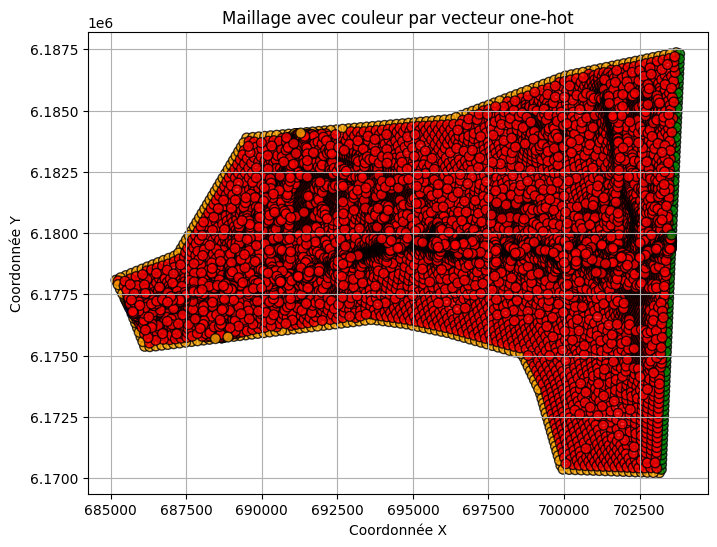

In [19]:
import matplotlib.pyplot as plt
from collections import Counter

one_hot_vectors = base_bin_8[0][0].ndata['static'][:,:4]
print(one_hot_vectors.shape)
# Associe des couleurs en fonction des indices du one-hot vector
colors = ['red', 'green', 'blue', 'orange']  # Une couleur par catégorie
categories = np.argmax(one_hot_vectors, axis=1)  # Trouve l'indice 1 pour chaque vecteur
point_colors = [colors[cat] for cat in categories]

point_colors = [colors[cat] for cat in categories]

# Comptage des points pour chaque catégorie
color_counts = Counter(point_colors)

# Afficher les résultats des comptes
print("Nombre de points par catégorie (couleur) :")
for color, count in color_counts.items():
    print(f"{color}: {count}")
    
# Création du scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X_coarse[:, 0], X_coarse[:, 1], c=point_colors, edgecolor='k', s=50, alpha=0.8)
plt.title("Maillage avec couleur par vecteur one-hot")
plt.xlabel("Coordonnée X")
plt.ylabel("Coordonnée Y")
plt.grid(True)
plt.show()

In [3]:
import matplotlib.pyplot as plt
import matplotlib.tri as mtri
import numpy as np

In [13]:
from matplotlib.colors import LinearSegmentedColormap, Normalize

# Define a custom colormap that goes from white to blue
colors = [(1, 1, 1), (0, 0, 1)]  # White to Blue
custom_cmap = LinearSegmentedColormap.from_list('white_to_blue', colors)

In [11]:
def load_mesh(mesh_path):
    res_mesh = TelemacFile(mesh_path)
    X,triangle = add_mesh_info(res_mesh)
    return X,triangle

def find_file_with_extension(directory, extension):
    """
    Finds the first file with the given extension in the specified directory.
    """
    for file in os.listdir(directory):
        if file.endswith(extension):
            return os.path.join(directory, file)
    return None

def load_pkl_file(filepath):
    """
    Loads a .pkl file using pickle.
    """
    with open(filepath, 'rb') as fp:
        data = pickle.load(fp)
    return data

# Load your data (assuming these functions are defined elsewhere)
results_name = "Group_3_peak_2400_Group_3_peak_2400_0_0-80"

fine_mesh_path = ['/work/m24046/m24046mrcr/results_data_30min_35_70/']

coarse_mesh_paths = ['/work/m24046/m24046mrcr/results_data_30min_35_70_maillagex{}/'.format(disc) for disc in [2,4,8,16,32]]

mesh_paths = fine_mesh_path+coarse_mesh_paths

mesh_triangle_list = []
results_list = []
for mesh_path in mesh_paths :
    slf = find_file_with_extension(mesh_path, '.slf')
    mesh_triangle_list.append(load_mesh(slf))
    
    if mesh_path == fine_mesh_path[0] :
        path_data = mesh_path+results_name+'.pkl'
    else :
        path_data = mesh_path+results_name+'_interpolated.pkl'
    valeur = load_pkl_file(path_data)
    results_list.append(valeurs)

In [ ]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as mtri

# Assume custom_cmap is defined
# from your_colormap_module import custom_cmap

def load_mesh(mesh_path):
    res_mesh = TelemacFile(mesh_path)
    X, triangle = add_mesh_info(res_mesh)
    return X, triangle

def find_file_with_extension(directory, extension):
    for file in os.listdir(directory):
        if file.endswith(extension):
            return os.path.join(directory, file)
    return None

def load_pkl_file(filepath):
    with open(filepath, 'rb') as fp:
        data = pickle.load(fp)
    return data

# Load your data
results_name = "Group_3_peak_2400_Group_3_peak_2400_0_0-80"

fine_mesh_path = ['/work/m24046/m24046mrcr/results_data_30min_35_70/']

coarse_mesh_paths = ['/work/m24046/m24046mrcr/results_data_30min_35_70_maillagex{}/'.format(disc) for disc in [2,4,8,16]]

mesh_paths = fine_mesh_path + coarse_mesh_paths

# Initialize lists to store meshes and results
mesh_triangle_list = []
results_list = []

for mesh_path in mesh_paths:
    slf = find_file_with_extension(mesh_path, '.slf')
    X, triangle = load_mesh(slf)
    mesh_triangle_list.append((X, triangle))
    
    if mesh_path == fine_mesh_path[0]:
        path_data = os.path.join(mesh_path, results_name + '.pkl')
    else:
        path_data = os.path.join(mesh_path, results_name + '_interpolated.pkl')
    valeurs = load_pkl_file(path_data)
    results_list.append(valeurs)

# Pair each mesh with its results
mesh_results_pairs = list(zip(mesh_triangle_list, results_list))

# Determine the number of time steps (assuming all datasets have the same number of time steps)
num_time_steps = len(results_list[0])

# Loop over time steps
for idx in range(num_time_steps):
    fig, axs = plt.subplots(1, len(mesh_results_pairs), figsize=(5 * len(mesh_results_pairs), 6))
    
    if len(mesh_results_pairs) == 1:
        axs = [axs]  # Ensure axs is iterable when there's only one subplot
    
    z_values = []
    # First, collect z_values to compute global vmin and vmax for normalization
    for ((X, triangles), valeurs) in mesh_results_pairs:
        (a_i, _) = valeurs[idx]
        z = a_i[:, 0]
        z = np.nan_to_num(z, nan=0.0, posinf=0.0, neginf=0.0)
        z_values.append(z)
    
    # Compute global vmin and vmax
    vmin = min(z.min() for z in z_values)
    vmax = max(z.max() for z in z_values)
    
    # Now plot each mesh
    for ax, ((X, triangles), valeurs), z in zip(axs, mesh_results_pairs, z_values):
        tri = mtri.Triangulation(X[:, 0], X[:, 1], triangles)
        
        # Ensure that the data arrays are correctly shaped
        assert z.shape[0] == X.shape[0], f"Mismatch between z and X at time step {idx}"
        
        # Plot the data
        tcf = ax.tripcolor(tri, z, shading='flat', vmin=vmin, vmax=vmax, cmap=custom_cmap)
        ax.set_title(f'Mesh Data at Time Step {idx+1}')
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        fig.colorbar(tcf, ax=ax, orientation='vertical')
    
    plt.tight_layout()
    plt.show()


In [2]:
from python.create_dgl_dataset import extract_node_type,get_static_node_features,NodeType,get_dgl_graph,extract_fond,extract_coeff

def create_coarse_graph_with_interpolated_static_features(
    coarse_slf_file,
    coarse_cli_file,
    fine_slf_file,
    fine_cli_file,
    output_base_bin_file
):
    """
    Create a DGL graph for the coarse mesh, interpolating the static node features (strickler and z)
    from the fine mesh using linear interpolation.

    Args:
        coarse_slf_file (str): Path to the coarse .slf mesh file.
        coarse_cli_file (str): Path to the coarse .cli boundary conditions file.
        fine_slf_file (str): Path to the fine .slf mesh file.
        fine_cli_file (str): Path to the fine .cli boundary conditions file.
        output_base_bin_file (str): Path to save the coarse mesh _base.bin DGL graph.

    Returns:
        None
    """
    import torch
    import numpy as np
    import dgl
    from scipy.interpolate import LinearNDInterpolator
    from scipy.spatial import cKDTree

    # Load the fine mesh and extract positions and static features
    res_fine = TelemacFile(fine_slf_file, bnd_file=fine_cli_file)
    res_mesh_fine = TelemacFile(fine_slf_file)

    # Get positions of fine mesh nodes
    pos_fine, _ = add_mesh_info(res_mesh_fine)  # Positions are in shape (num_nodes, 2)

    # Get static node features for fine mesh
    static_node_features_fine = get_static_node_features(res_fine, res_mesh_fine)

    # Extract 'strickler' and 'z' from fine static features
    node_type_length = NodeType.SIZE  # Typically 4
    strickler_fine = static_node_features_fine[:, node_type_length]
    z_fine = static_node_features_fine[:, node_type_length + 1]

    # Load the coarse mesh and extract positions
    res_coarse = TelemacFile(coarse_slf_file, bnd_file=coarse_cli_file)
    res_mesh_coarse = TelemacFile(coarse_slf_file)

    pos_coarse, _ = add_mesh_info(res_mesh_coarse)

    # Interpolate 'strickler' and 'z' using linear interpolation
    # Create interpolators based on the fine mesh data
    interpolator_strickler = LinearNDInterpolator(pos_fine, strickler_fine)
    interpolator_z = LinearNDInterpolator(pos_fine, z_fine)

    # Interpolate at coarse mesh positions
    strickler_coarse = interpolator_strickler(pos_coarse)
    z_coarse = interpolator_z(pos_coarse)

    # Handle NaN values (points outside the convex hull)
    nan_indices_strickler = np.isnan(strickler_coarse)
    nan_indices_z = np.isnan(z_coarse)

    if np.any(nan_indices_strickler) or np.any(nan_indices_z):
        # Use nearest-neighbor interpolation for NaN values
        print("Handling NaN values by nearest-neighbor interpolation...")
        # Build KDTree for fine mesh positions
        tree = cKDTree(pos_fine)
        # Query nearest neighbors for NaN positions
        _, idx = tree.query(pos_coarse[nan_indices_strickler])
        strickler_coarse[nan_indices_strickler] = strickler_fine[idx]

        _, idx = tree.query(pos_coarse[nan_indices_z])
        z_coarse[nan_indices_z] = z_fine[idx]

    # Extract node types for the coarse mesh
    tri_coarse = res_coarse.tri
    bnd_info_coarse = res_coarse.get_bnd_info()
    node_type_coarse = extract_node_type(tri_coarse, bnd_info_coarse)

    # Combine node_type, strickler, and z for coarse mesh
    static_node_features_coarse = np.concatenate([
        node_type_coarse,
        strickler_coarse[:, np.newaxis],
        z_coarse[:, np.newaxis]
    ], axis=1).astype('float32')

    # Create DGL graph for the coarse mesh
    g_coarse, edge_features_coarse = get_dgl_graph(res_coarse.tri)
    g_coarse.edata['x'] = torch.tensor(edge_features_coarse, dtype=torch.float32)

    # Assign static node features to the coarse graph
    g_coarse.ndata['static'] = torch.tensor(static_node_features_coarse, dtype=torch.float32)

    # Save the graph
    dgl.save_graphs(output_base_bin_file, [g_coarse])

    print(f"Coarse graph saved to {output_base_bin_file}")


In [3]:
!ls /work/m24046/m24046mrcr/results_data_30min_35_70_maillagex8

Group_3_peak_1000_Group_3_peak_1000_0_0-80_interpolated.pkl
Group_3_peak_1200_Group_3_peak_1200_0_0-80_interpolated.pkl
Group_3_peak_1400_Group_3_peak_1400_0_0-80_interpolated.pkl
Group_3_peak_1800_Group_3_peak_1800_0_0-80_interpolated.pkl
Group_3_peak_2000_Group_3_peak_2000_0_0-80_interpolated.pkl
Group_3_peak_2400_Group_3_peak_2400_0_0-80_interpolated.pkl
Group_3_peak_2600_Group_3_peak_2600_0_0-80_interpolated.pkl
Group_3_peak_2800_Group_3_peak_2800_0_0-80_interpolated.pkl
Group_3_peak_3000_Group_3_peak_3000_0_0-80_interpolated.pkl
Group_3_peak_3400_Group_3_peak_3400_0_0-80_interpolated.pkl
Group_3_peak_3600_Group_3_peak_3600_0_0-80_interpolated.pkl
Mesh8_base.bin
Mesh8_corrige.slf
Multimesh_8_32.bin
cli


In [4]:
# Define file paths

mesh = 2

#coarse_slf_file = '/work/m24046/m24046mrcr/results_data_30min_35_70_maillagex{}/Mesh{}_corrige.slf'.format(mesh,mesh)
#coarse_cli_file = '/work/m24046/m24046mrcr/results_data_30min_35_70_maillagex{}/cli'.format(mesh)
fine_slf_file = '/work/m24046/m24046mrcr/results_data_30min_35_70/maillage_3.slf'
fine_cli_file = '/work/m24046/m24046mrcr/results_data_30min_35_70/cli'

coarse_slf_file = fine_slf_file
coarse_cli_file = fine_cli_file
#output_base_bin_file =  '/work/m24046/m24046mrcr/results_data_30min_35_70_maillagex{}/Mesh{}_base.bin'.format(mesh,mesh)

output_base_bin_file = '/work/m24046/m24046mrcr/results_data_30min_35_70/Mesh_base.bin'

# Create the coarse graph with interpolated static features
create_coarse_graph_with_interpolated_static_features(
    coarse_slf_file,
    coarse_cli_file,
    fine_slf_file,
    fine_cli_file,
    output_base_bin_file
)

Coarse graph saved to /work/m24046/m24046mrcr/results_data_30min_35_70/Mesh_base.bin


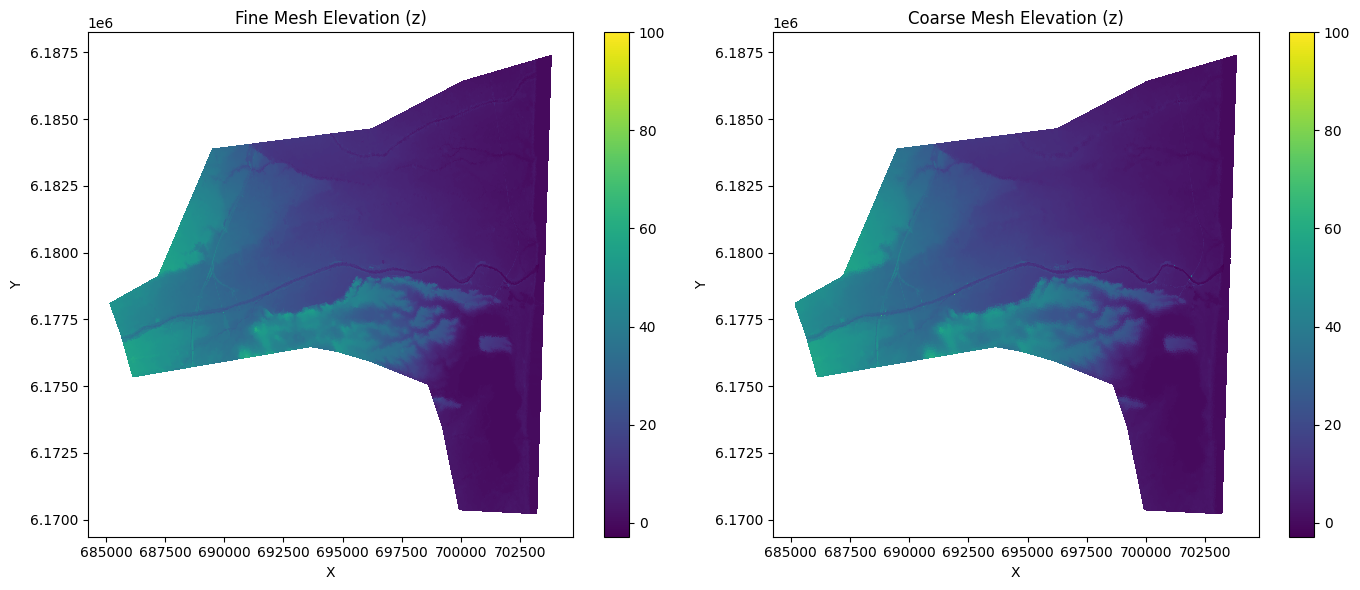

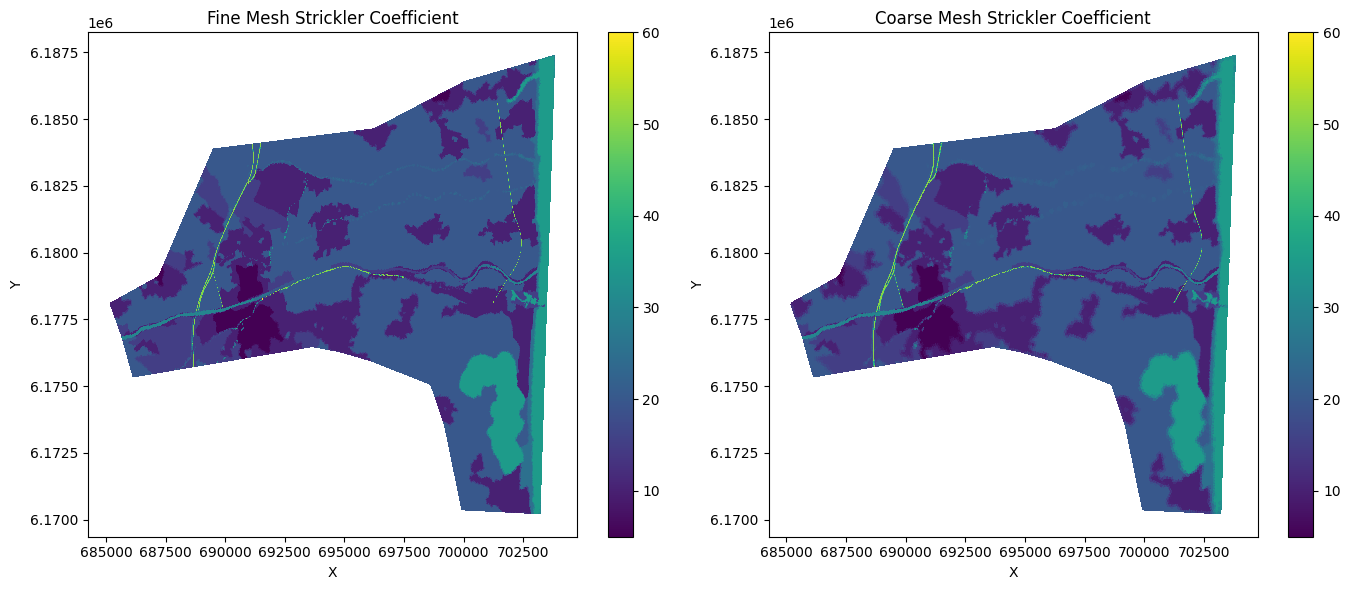

In [5]:
# Define file paths
import dgl
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as mtri
from matplotlib.colors import Normalize
from matplotlib import cm

coarse_slf_file = '/work/m24046/m24046mrcr/results_data_30min_35_70_maillagex{}/Mesh{}_corrige.slf'.format(mesh, mesh)
fine_slf_file = '/work/m24046/m24046mrcr/results_data_30min_35_70/maillage_3.slf'
coarse_bin_file = '/work/m24046/m24046mrcr/results_data_30min_35_70_maillagex{}/Mesh{}_base.bin'.format(mesh, mesh)

# Load the fine and coarse meshes
res_fine_mesh = TelemacFile(fine_slf_file)
res_coarse_mesh = TelemacFile(coarse_slf_file)

# Function to extract mesh data
def extract_mesh_data(res_mesh):
    # Get coordinates and triangle indices
    X_mesh, triangles_mesh = add_mesh_info(res_mesh)
    return X_mesh, triangles_mesh

# Extract data from fine mesh
X_fine, triangles_fine = extract_mesh_data(res_fine_mesh)

# Extract variables from fine mesh using your methods
timestep = 0  # Assuming static variables are at timestep 0
z_fine = extract_fond(res_fine_mesh, timestep).flatten()
strickler_fine = extract_coeff(res_fine_mesh, timestep).flatten()

# Extract data from coarse mesh
X_coarse, triangles_coarse = extract_mesh_data(res_coarse_mesh)

coarse_graph = dgl.load_graphs(coarse_bin_file)
z_coarse = coarse_graph[0][0].ndata['static'][:,5]
strickler_coarse = coarse_graph[0][0].ndata['static'][:,4]
# Ensure that the variable arrays match the number of nodes
assert z_coarse.shape[0] == X_coarse.shape[0], "Mismatch between z_coarse and X_coarse"
assert strickler_coarse.shape[0] == X_coarse.shape[0], "Mismatch between strickler_coarse and X_coarse"

# Create triangulation objects
tri_fine = mtri.Triangulation(X_fine[:, 0], X_fine[:, 1], triangles_fine)
tri_coarse = mtri.Triangulation(X_coarse[:, 0], X_coarse[:, 1], triangles_coarse)

# Function to plot variables side by side
def plot_variable_side_by_side(var_fine, var_coarse, tri_fine, tri_coarse, var_name):
    # Compute common normalization
    vmin = min(var_fine.min(), var_coarse.min())
    vmax = max(var_fine.max(), var_coarse.max())
    norm = Normalize(vmin=vmin, vmax=vmax)
    cmap = cm.viridis  # You can choose any colormap you prefer

    fig, axs = plt.subplots(1, 2, figsize=(14, 6))

    # Plot fine mesh variable
    tcf = axs[0].tripcolor(tri_fine, var_fine, shading='flat', cmap=cmap, norm=norm)
    axs[0].set_title(f'Fine Mesh {var_name}')
    axs[0].set_xlabel('X')
    axs[0].set_ylabel('Y')
    fig.colorbar(tcf, ax=axs[0], orientation='vertical')

    # Plot coarse mesh variable
    tcc = axs[1].tripcolor(tri_coarse, var_coarse, shading='flat', cmap=cmap, norm=norm)
    axs[1].set_title(f'Coarse Mesh {var_name}')
    axs[1].set_xlabel('X')
    axs[1].set_ylabel('Y')
    fig.colorbar(tcc, ax=axs[1], orientation='vertical')

    plt.tight_layout()
    plt.show()

# Plot 'z' variable (Elevation)
plot_variable_side_by_side(z_fine, z_coarse, tri_fine, tri_coarse, 'Elevation (z)')

# Plot 'strickler' variable
plot_variable_side_by_side(strickler_fine, strickler_coarse, tri_fine, tri_coarse, 'Strickler Coefficient')


In [73]:
!ls /work/m24046/m24046mrcr/work/m24046/m24046mrcr/new_tests_Group3/

config1  config1_short	config1_short_x8_no_multimesh
